<a href="https://colab.research.google.com/github/AlexxLai/ml0716/blob/master/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# boston
df = pd.DataFrame(boston["data"],columns = boston["feature_names"])
df["target"] = boston["target"]
df.to_csv("boston.csv",encoding = "utf-8",index = False) # index是最前項的0,1,2,...的值
df

In [9]:
from sklearn.model_selection import train_test_split # 設計測試資料集，引入此套件
# [90% data , 10% data , 90% target , 10% target]
x_train,x_test,y_train,y_test = train_test_split(boston["data"],boston["target"],test_size = 0.1) # 依照位置切割比例
                                                              

In [11]:
from sklearn.tree import DecisionTreeRegressor # 引入決策樹套件
# clf = DecisionTreeRegressor() # 交由程式設定節點值
reg = DecisionTreeRegressor(max_depth = 3,random_state = 0) # random_state固定才能夠比較，否則在每執行一次，就回
                                 # 重新抓取再訓練一次模型，會造成每次結果不同，無從比較
reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

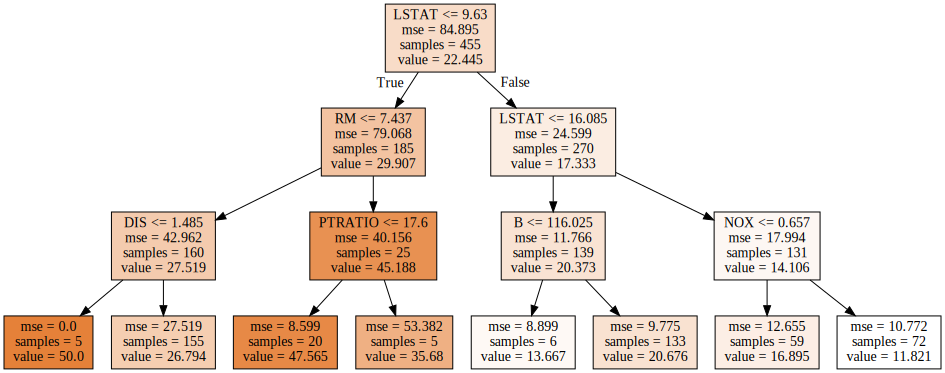

In [14]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg,
                    feature_names = boston["feature_names"],
                    filled = True, # 顏色
                    max_depth = 3  # 顯示出要的層數
                    )
graphviz.Source(g)

In [18]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
# pre2 = reg.predict(x_train)
r2_score(y_test,pre) # 測試資料的r2
# r2_score(y_train,pre2) # 訓練資料的r2

# 使用numpy可以用來實現兩個list的直接相減
# import numpy as np
# interval = np.subtract(pre,y_test)
# interval

0.689912092935667

In [19]:
# 特徵重要程度
reg.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.02689088,
       0.21740558, 0.        , 0.08401406, 0.        , 0.        ,
       0.01819849, 0.00908471, 0.64440628])